In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


R-squared for Medu vs G3: 0.05767238588287016
                            OLS Regression Results                            
Dep. Variable:                   Medu   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     39.60
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           5.75e-10
Time:                        11:32:16   Log-Likelihood:                -983.04
No. Observations:                 649   AIC:                             1970.
Df Residuals:                     647   BIC:                             1979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

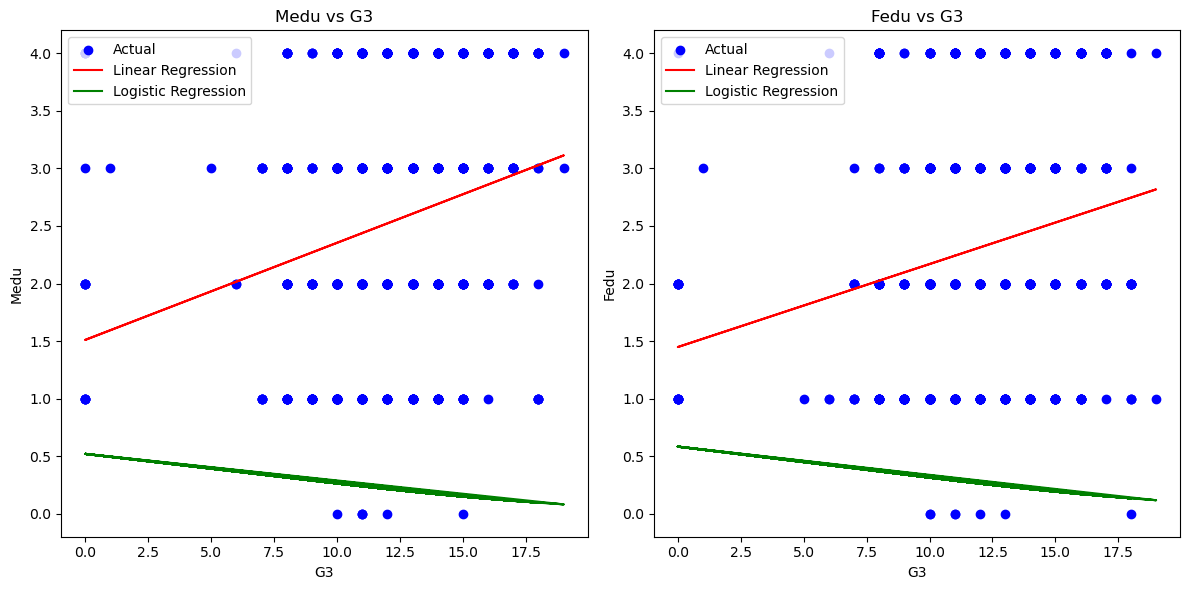

Slope of the regression line for Medu: [0.0843369]
Slope of the regression line for Fedu: [0.07211074]


In [3]:
# Not used 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


# Load the data
student_performance_df = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv', sep= ',')

selected_data = student_performance_df[student_performance_df['G3'] >= 5] # Outliers excluded

# Select 'Medu', 'Fedu', and 'G3' columns
selected_data = student_performance_df[['Medu', 'Fedu', 'G3']]

#=========================Medu================================================

# Extract features and target for Medu
X_medu = selected_data[['G3']]
y_medu = selected_data['Medu']


model_medu = LinearRegression() # linear regression model

model_medu_sm = sm.OLS(y_medu, sm.add_constant(X_medu))
results_medu = model_medu_sm.fit()

print("R-squared for Medu vs G3:", results_medu.rsquared) # R-squared value and summary
print(results_medu.summary())

model_medu.fit(X_medu, y_medu) # Fit the linear regression

y_pred_medu = model_medu.predict(X_medu) # Predictions for linear regression

# Compute mean squared error for Medu vs G3
mse_medu = mean_squared_error(y_medu, y_pred_medu)
print("Mean Squared Error for Medu vs G3:", mse_medu)

logreg_medu = LogisticRegression() # Logistic Regression for Medu
logreg_medu.fit(X_medu, y_medu)
y_pred_proba_medu = logreg_medu.predict_proba(X_medu)[:,1]



#===========================Fedu===============================================

# Extract features and target for Fedu
X_fedu = selected_data[['G3']]
y_fedu = selected_data['Fedu']



# linear regression model
model_fedu = LinearRegression()

model_fedu_sm = sm.OLS(y_fedu, sm.add_constant(X_fedu))
results_fedu = model_fedu_sm.fit()

print("R-squared for Fedu vs G3:", results_fedu.rsquared) #  R-squared value and summary
print(results_fedu.summary())

model_fedu.fit(X_fedu, y_fedu) #  Fit the linear regression models

y_pred_fedu = model_fedu.predict(X_fedu) # Predictions for linear regression

# Compute mean squared error for Fedu vs G3
mse_fedu = mean_squared_error(y_fedu, y_pred_fedu)
print("Mean Squared Error for Fedu vs G3:", mse_fedu)

logreg_fedu = LogisticRegression() # Logistic Regression for Fedu
logreg_fedu.fit(X_fedu, y_fedu)
y_pred_proba_fedu = logreg_fedu.predict_proba(X_fedu)[:,1]



#=========================Plot for both using linear and logistic===============
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Medu vs G3 (linear regression)
axs[0].scatter(X_medu, y_medu, color='blue', label='Actual')
axs[0].plot(X_medu, y_pred_medu, color='red', label='Linear Regression')
axs[0].set_xlabel('G3')
axs[0].set_ylabel('Medu')
axs[0].set_title('Medu vs G3')
axs[0].legend()

# Plot Fedu vs G3 (linear regression)
axs[1].scatter(X_fedu, y_fedu, color='blue', label='Actual')
axs[1].plot(X_fedu, y_pred_fedu, color='red', label='Linear Regression')
axs[1].set_xlabel('G3')
axs[1].set_ylabel('Fedu')
axs[1].set_title('Fedu vs G3')
axs[1].legend()

# Plot Medu vs G3 (logistic regression)
axs[0].plot(X_medu, y_pred_proba_medu, color='green', label='Logistic Regression')
axs[0].legend()

# Plot Fedu vs G3 (logistic regression)
axs[1].plot(X_fedu, y_pred_proba_fedu, color='green', label='Logistic Regression')
axs[1].legend()

plt.tight_layout()
plt.show()


#slope
model_medu.fit(X_medu, y_medu)

slope_medu = model_medu.coef_

print("Slope of the regression line for Medu:", slope_medu)



model_fedu.fit(X_fedu, y_fedu)

slope_fedu = model_fedu.coef_

print("Slope of the regression line for Fedu:", slope_fedu)

R-squared for Medu vs G3: 0.07766789296282894
                            OLS Regression Results                            
Dep. Variable:                   Medu   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     53.14
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           9.35e-13
Time:                        19:40:39   Log-Likelihood:                -951.42
No. Observations:                 633   AIC:                             1907.
Df Residuals:                     631   BIC:                             1916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

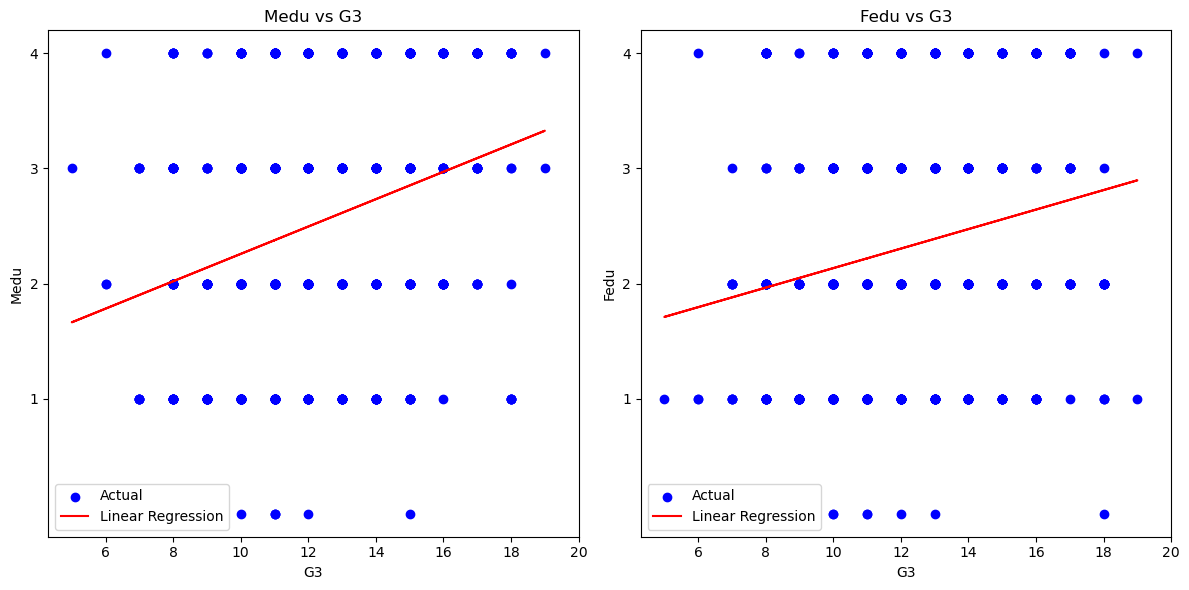

Slope of the linear regression line for Medu: [0.11889643]
Slope of the linear regression line for Fedu: [0.08479804]


In [31]:
# Not used 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm


student_performance_df = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv', sep= ',')

selected_data = student_performance_df[student_performance_df['G3'] >= 5] # Outliers excluded


selected_data = selected_data[['Medu', 'Fedu', 'G3']]

#=========================Medu================================================

X_medu = selected_data[['G3']]
y_medu = selected_data['Medu']

model_medu = LinearRegression() # linear regression model

model_medu_sm = sm.OLS(y_medu, sm.add_constant(X_medu))
results_medu = model_medu_sm.fit()

residuals_medu = results_medu.resid # residual

print("R-squared for Medu vs G3:", results_medu.rsquared) # R-squared value and summary
print(results_medu.summary())


model_medu.fit(X_medu, y_medu) # Fit the linear regression

y_pred_medu = model_medu.predict(X_medu) # Predictions for linear regression


#===========================Fedu===============================================

X_fedu = selected_data[['G3']]
y_fedu = selected_data['Fedu']

# linear regression model
model_fedu = LinearRegression()

model_fedu_sm = sm.OLS(y_fedu, sm.add_constant(X_fedu))
results_fedu = model_fedu_sm.fit()

residuals_fedu = results_fedu.resid # residual

print("R-squared for Fedu vs G3:", results_fedu.rsquared) #  R-squared value and summary
print(results_fedu.summary())


model_fedu.fit(X_fedu, y_fedu) #  Fit the linear regression models

y_pred_fedu = model_fedu.predict(X_fedu) # Predictions for linear regression


#=========================Plot for both using linear and logistic===============
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Round 'Medu' and 'Fedu' values
selected_data['Medu'] = selected_data['Medu'].round()
selected_data['Fedu'] = selected_data['Fedu'].round()

# Filter out fractional values
selected_data = selected_data[(selected_data['Medu'] % 1 == 0) & (selected_data['Fedu'] % 1 == 0)]

# Plot Medu vs G3 (linear regression)
axs[0].scatter(X_medu, y_medu, color='blue', label='Actual')
axs[0].plot(X_medu, y_pred_medu, color='red', label='Linear Regression')
axs[0].set_xlabel('G3')
axs[0].set_ylabel('Medu')
axs[0].set_title('Medu vs G3')
axs[0].set_xticks(np.arange(6, 21, 2))  # Set x-axis ticks from 6 to 20 in steps of 2
axs[0].set_yticks(np.arange(1, 5))       # Set y-axis ticks from 1 to 4
axs[0].legend()

# Plot Fedu vs G3 (linear regression)
axs[1].scatter(X_fedu, y_fedu, color='blue', label='Actual')
axs[1].plot(X_fedu, y_pred_fedu, color='red', label='Linear Regression')
axs[1].set_xlabel('G3')
axs[1].set_ylabel('Fedu')
axs[1].set_title('Fedu vs G3')
axs[1].set_xticks(np.arange(6, 21, 2))  # Set x-axis ticks from 6 to 20 in steps of 2
axs[1].set_yticks(np.arange(1, 5))       # Set y-axis ticks from 1 to 4
axs[1].legend()

plt.tight_layout()
plt.show()


#slope
model_medu.fit(X_medu, y_medu)

slope_medu = model_medu.coef_

print("Slope of the linear regression line for Medu:", slope_medu)



model_fedu.fit(X_fedu, y_fedu)

slope_fedu = model_fedu.coef_

print("Slope of the linear regression line for Fedu:", slope_fedu)

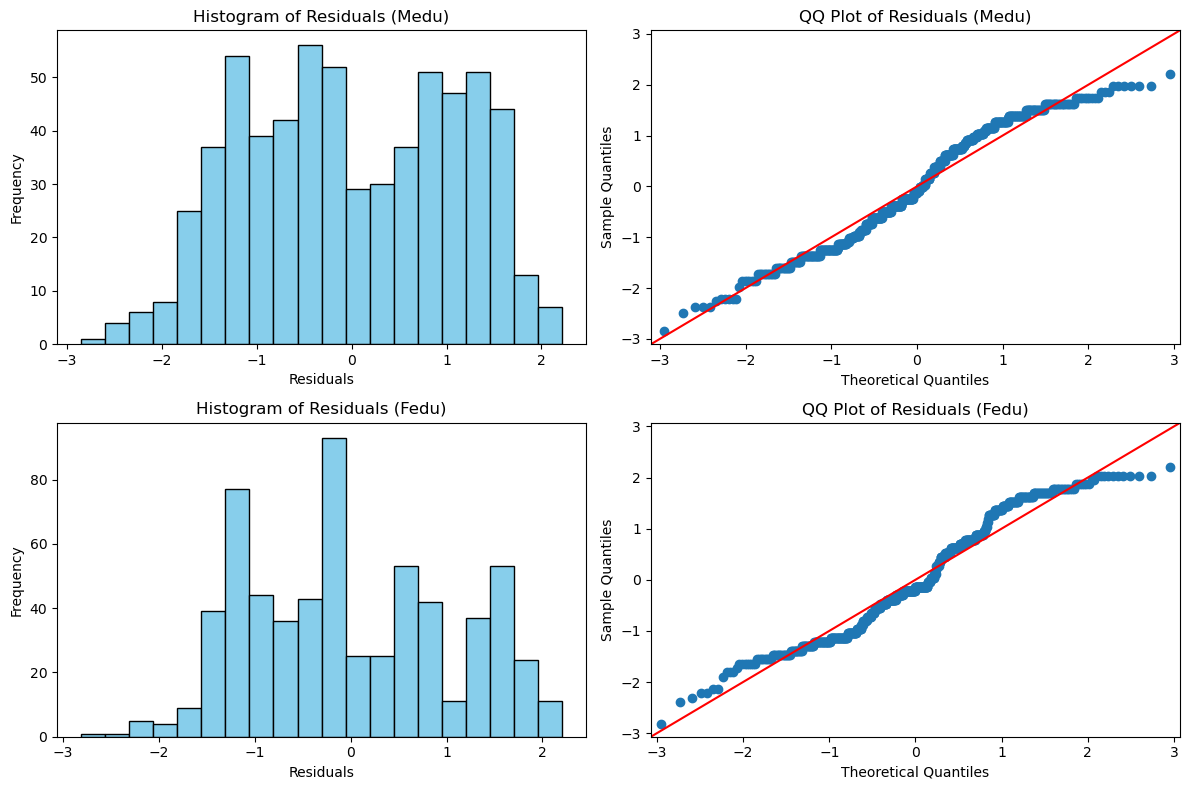

In [35]:
#used Figure 10
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats


residuals_medu = results_medu.resid # Get the residuals for Medu and Fedu
residuals_fedu = results_fedu.resid


fig, axs = plt.subplots(2, 2, figsize=(12, 8)) # figure and subplots using list comprehensions

# Histograms and QQ plots for residuals_medu and residuals_fedu
for ax_row, residuals, title_suffix in zip(axs, [residuals_medu, residuals_fedu], ['(Medu)', '(Fedu)']):
    # Histogram
    ax_row[0].hist(residuals, bins=20, color='skyblue', edgecolor='black')
    ax_row[0].set_title(f'Histogram of Residuals {title_suffix}')
    ax_row[0].set_xlabel('Residuals')
    ax_row[0].set_ylabel('Frequency')
    
    # QQ plot
    sm.qqplot(residuals, line='45', ax=ax_row[1])
    ax_row[1].set_title(f'QQ Plot of Residuals {title_suffix}')

plt.tight_layout()
plt.show()

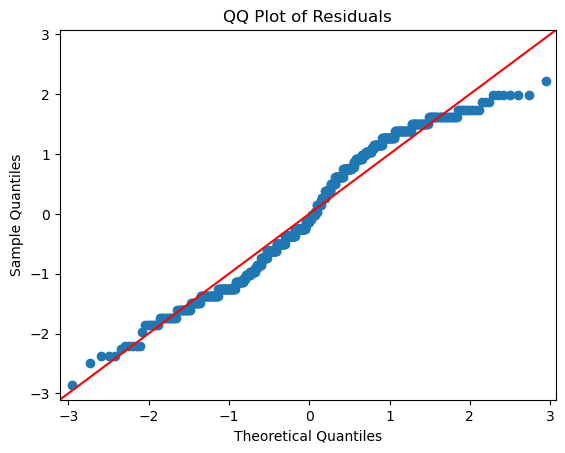

In [32]:
# Not used
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals_medu = results_medu.resid # the residuals for Medu linear regression obtained from previous code


residuals_fedu = results_fedu.resid # the residuals for Fedu linear regression obtained from previous code

fig = sm.qqplot(residuals_medu, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

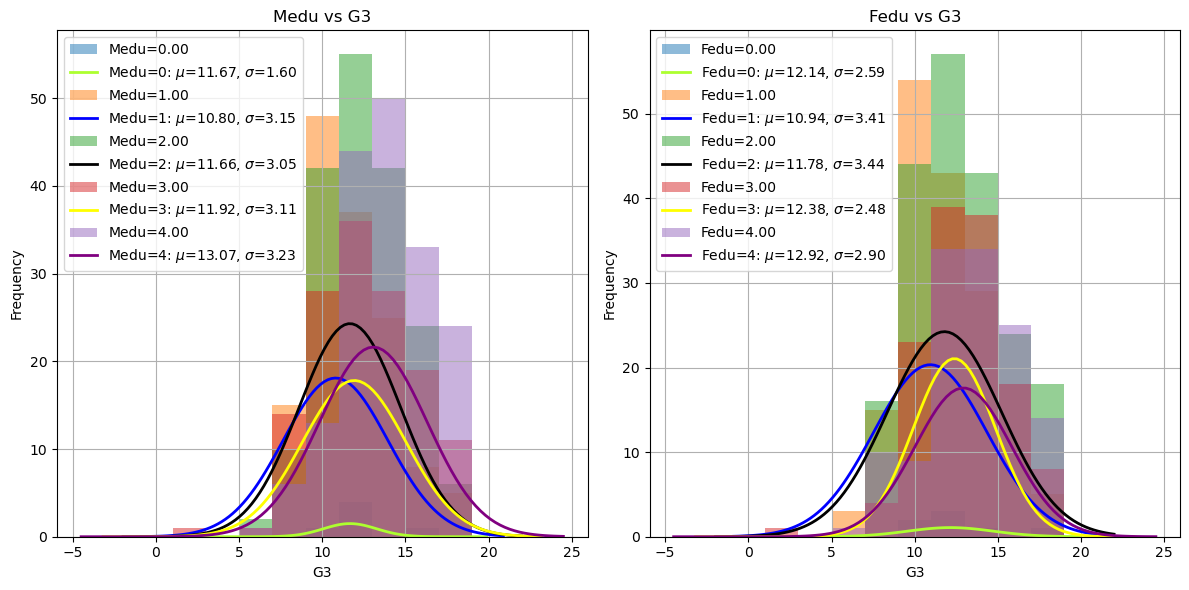

Medu=0: Mean=11.67, Std=1.75, N=6, SE=0.71, z=1.96, ME=1.40, Lower Bound=10.27, Upper Bound=13.07
Medu=1: Mean=10.80, Std=3.16, N=143, SE=0.26, z=1.96, ME=0.52, Lower Bound=10.28, Upper Bound=11.32
Medu=2: Mean=11.66, Std=3.06, N=186, SE=0.22, z=1.96, ME=0.44, Lower Bound=11.22, Upper Bound=12.10
Medu=3: Mean=11.92, Std=3.12, N=139, SE=0.26, z=1.96, ME=0.52, Lower Bound=11.40, Upper Bound=12.44
Medu=4: Mean=13.07, Std=3.24, N=175, SE=0.24, z=1.96, ME=0.48, Lower Bound=12.59, Upper Bound=13.55
Fedu=0: Mean=12.14, Std=2.79, N=7, SE=1.06, z=1.96, ME=2.07, Lower Bound=10.07, Upper Bound=14.21
Fedu=1: Mean=10.94, Std=3.42, N=174, SE=0.26, z=1.96, ME=0.51, Lower Bound=10.43, Upper Bound=11.45
Fedu=2: Mean=11.78, Std=3.45, N=209, SE=0.24, z=1.96, ME=0.47, Lower Bound=11.32, Upper Bound=12.25
Fedu=3: Mean=12.38, Std=2.49, N=131, SE=0.22, z=1.96, ME=0.43, Lower Bound=11.96, Upper Bound=12.81
Fedu=4: Mean=12.92, Std=2.92, N=128, SE=0.26, z=1.96, ME=0.51, Lower Bound=12.42, Upper Bound=13.43


In [28]:
 #  likelihood and normal w/ outliers Used Figure 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

# Define confidence level
confidence_level = 0.95

# Load the data
student_performance_df = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv', sep= ',')

# Filter rows with Medu and Fedu between 0 and 4
selected_data = student_performance_df[(student_performance_df['Medu'] >= 0) & (student_performance_df['Medu'] <= 4)]
selected_data = selected_data[(selected_data['Fedu'] >= 0) & (selected_data['Fedu'] <= 4)]

# Tight the data
selected_data['Medu'] = selected_data['Medu'].round()
selected_data['Fedu'] = selected_data['Fedu'].round()

# Define individual colors for each normal curve
colors = ['greenyellow','b', 'k', 'yellow', 'purple']

# Plot histogram of Medu vs G3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
means_medu = []  # List to store means for Medu
for i, medu in enumerate(range(5)):  # Include Medu=0
    data = selected_data[selected_data['Medu'] == medu]
    plt.hist(data['G3'], bins=range(1, 21, 2), alpha=0.5, label=f'Medu={medu:.2f}')
    mu, std = norm.fit(data['G3'])
    means_medu.append(mu)  # Append mean to the list
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p * len(data['G3']), linewidth=2, label=f'Medu={medu}: $\mu$={mu:.2f}, $\sigma$={std:.2f}', color=colors[i])  # Overlay normal distribution curve
    plt.title('Medu vs G3')
    plt.xlabel('G3')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

# Plot histogram of Fedu vs G3
plt.subplot(1, 2, 2)
means_fedu = []  # List to store means for Fedu
for i, fedu in enumerate(range(5)):  # Include Fedu=0
    data = selected_data[selected_data['Fedu'] == fedu]
    plt.hist(data['G3'], bins=range(1, 21, 2), alpha=0.5, label=f'Fedu={fedu:.2f}')
    mu, std = norm.fit(data['G3'])
    means_fedu.append(mu)  # Append mean to the list
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p * len(data['G3']), linewidth=2, label=f'Fedu={fedu}: $\mu$={mu:.2f}, $\sigma$={std:.2f}', color=colors[i])
    plt.title('Fedu vs G3')
    plt.xlabel('G3')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

def calculate_confidence_intervals(group_data):
    sample_mean = group_data['G3'].mean()
    sample_std = group_data['G3'].std()
    sample_size = len(group_data)
    SE = sample_std / np.sqrt(sample_size)
    z_critical = stats.norm.ppf((1 + confidence_level) / 2)
    ME = z_critical * SE
    lower_bound = sample_mean - ME
    upper_bound = sample_mean + ME
    return sample_mean, sample_std, sample_size, SE, z_critical, ME, lower_bound, upper_bound

# Calculate and print confidence intervals for Medu groups
for group_name, group_data in selected_data.groupby('Medu'):
    mean, std, size, SE, z, ME, lower, upper = calculate_confidence_intervals(group_data)
    print(f"Medu={group_name}: Mean={mean:.2f}, Std={std:.2f}, N={size}, SE={SE:.2f}, z={z:.2f}, ME={ME:.2f}, Lower Bound={lower:.2f}, Upper Bound={upper:.2f}")

# Calculate and print confidence intervals for Fedu groups
for group_name, group_data in selected_data.groupby('Fedu'):
    mean, std, size, SE, z, ME, lower, upper = calculate_confidence_intervals(group_data)
    print(f"Fedu={group_name}: Mean={mean:.2f}, Std={std:.2f}, N={size}, SE={SE:.2f}, z={z:.2f}, ME={ME:.2f}, Lower Bound={lower:.2f}, Upper Bound={upper:.2f}")


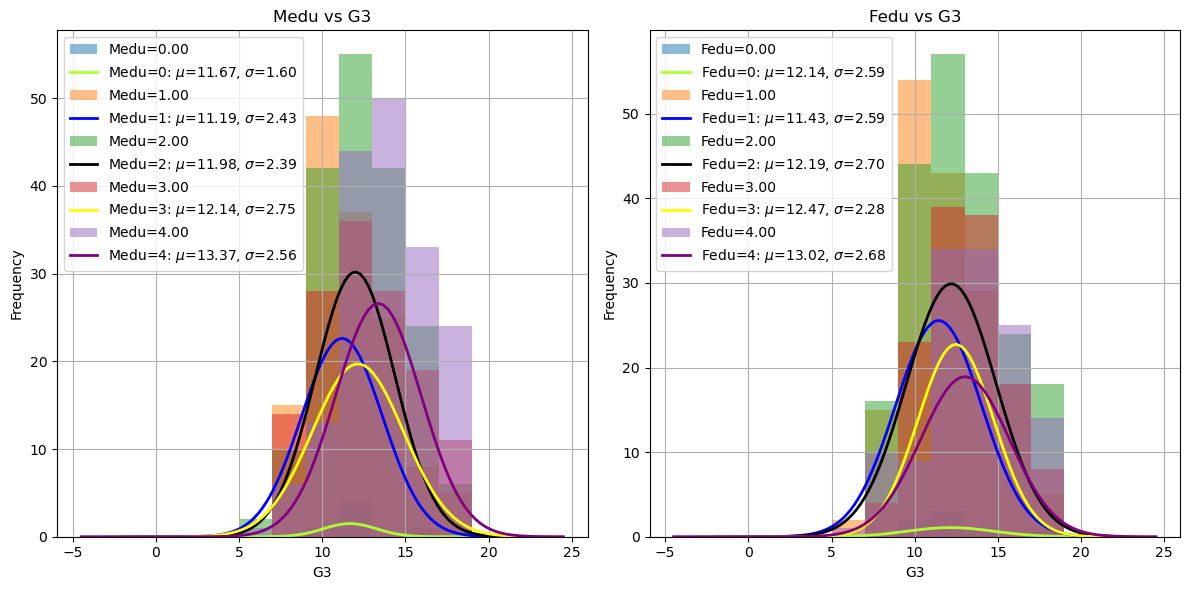

Medu=0: Mean=11.67, Std=1.75, N=6, SE=0.71, z=1.96, ME=1.40, Lower Bound=10.27, Upper Bound=13.07
Medu=1: Mean=11.19, Std=2.44, N=138, SE=0.21, z=1.96, ME=0.41, Lower Bound=10.78, Upper Bound=11.60
Medu=2: Mean=11.98, Std=2.40, N=181, SE=0.18, z=1.96, ME=0.35, Lower Bound=11.63, Upper Bound=12.33
Medu=3: Mean=12.14, Std=2.76, N=136, SE=0.24, z=1.96, ME=0.46, Lower Bound=11.68, Upper Bound=12.60
Medu=4: Mean=13.37, Std=2.57, N=171, SE=0.20, z=1.96, ME=0.39, Lower Bound=12.99, Upper Bound=13.76
Fedu=0: Mean=12.14, Std=2.79, N=7, SE=1.06, z=1.96, ME=2.07, Lower Bound=10.07, Upper Bound=14.21
Fedu=1: Mean=11.43, Std=2.60, N=166, SE=0.20, z=1.96, ME=0.40, Lower Bound=11.04, Upper Bound=11.83
Fedu=2: Mean=12.19, Std=2.70, N=202, SE=0.19, z=1.96, ME=0.37, Lower Bound=11.82, Upper Bound=12.57
Fedu=3: Mean=12.47, Std=2.29, N=130, SE=0.20, z=1.96, ME=0.39, Lower Bound=12.08, Upper Bound=12.86
Fedu=4: Mean=13.02, Std=2.69, N=127, SE=0.24, z=1.96, ME=0.47, Lower Bound=12.56, Upper Bound=13.49


In [27]:
 #  likelihood and normal without outliers Used Figure 3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

# Define confidence level
confidence_level = 0.95

# Load the data
student_performance_df = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv', sep= ',')

# Filter rows with Medu and Fedu between 0 and 4
selected_data = student_performance_df[(student_performance_df['Medu'] >= 0) & (student_performance_df['Medu'] <= 4)]
selected_data = selected_data[(selected_data['Fedu'] >= 0) & (selected_data['Fedu'] <= 4)]

# Remove rows with NaN values and 'G3'>=5
selected_data = selected_data.dropna(subset=['G3'])
selected_data = selected_data[selected_data['G3'] > 5]

# Tight the data
selected_data['Medu'] = selected_data['Medu'].round()
selected_data['Fedu'] = selected_data['Fedu'].round()

# Define individual colors for each normal curve
colors = ['greenyellow','b', 'k', 'yellow', 'purple']

# Plot histogram of Medu vs G3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
means_medu = []  # List to store means for Medu
for i, medu in enumerate(range(5)):  # Include Medu=0
    data = selected_data[selected_data['Medu'] == medu]
    plt.hist(data['G3'], bins=range(1, 21, 2), alpha=0.5, label=f'Medu={medu:.2f}')
    mu, std = norm.fit(data['G3'])
    means_medu.append(mu)  # Append mean to the list
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p * len(data['G3']), linewidth=2, label=f'Medu={medu}: $\mu$={mu:.2f}, $\sigma$={std:.2f}', color=colors[i])  # Overlay normal distribution curve
    plt.title('Medu vs G3')
    plt.xlabel('G3')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

# Plot histogram of Fedu vs G3
plt.subplot(1, 2, 2)
means_fedu = []  # List to store means for Fedu
for i, fedu in enumerate(range(5)):  # Include Fedu=0
    data = selected_data[selected_data['Fedu'] == fedu]
    plt.hist(data['G3'], bins=range(1, 21, 2), alpha=0.5, label=f'Fedu={fedu:.2f}')
    mu, std = norm.fit(data['G3'])
    means_fedu.append(mu)  # Append mean to the list
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p * len(data['G3']), linewidth=2, label=f'Fedu={fedu}: $\mu$={mu:.2f}, $\sigma$={std:.2f}', color=colors[i])
    plt.title('Fedu vs G3')
    plt.xlabel('G3')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

def calculate_confidence_intervals(group_data):
    sample_mean = group_data['G3'].mean()
    sample_std = group_data['G3'].std()
    sample_size = len(group_data)
    SE = sample_std / np.sqrt(sample_size)
    z_critical = stats.norm.ppf((1 + confidence_level) / 2)
    ME = z_critical * SE
    lower_bound = sample_mean - ME
    upper_bound = sample_mean + ME
    return sample_mean, sample_std, sample_size, SE, z_critical, ME, lower_bound, upper_bound

# Calculate and print confidence intervals for Medu groups
for group_name, group_data in selected_data.groupby('Medu'):
    mean, std, size, SE, z, ME, lower, upper = calculate_confidence_intervals(group_data)
    print(f"Medu={group_name}: Mean={mean:.2f}, Std={std:.2f}, N={size}, SE={SE:.2f}, z={z:.2f}, ME={ME:.2f}, Lower Bound={lower:.2f}, Upper Bound={upper:.2f}")

# Calculate and print confidence intervals for Fedu groups
for group_name, group_data in selected_data.groupby('Fedu'):
    mean, std, size, SE, z, ME, lower, upper = calculate_confidence_intervals(group_data)
    print(f"Fedu={group_name}: Mean={mean:.2f}, Std={std:.2f}, N={size}, SE={SE:.2f}, z={z:.2f}, ME={ME:.2f}, Lower Bound={lower:.2f}, Upper Bound={upper:.2f}")


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
student_performance_df = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv', sep= ',')

# Select 'Medu', 'Fedu', and 'G3' columns
selected_data = student_performance_df[['Medu', 'Fedu', 'G3']]

# Calculate the mean for Medu >= 2.0 and G3 >= 15.0
mean_medu_between = selected_data[(selected_data['Medu'] >= 2.0) & (selected_data['G3'] >= 15.0)]['Medu'].mean()

# Calculate the mean for Fedu >= 2.0 and G3 >= 15.0
mean_fedu_between= selected_data[(selected_data['Fedu'] >= 2.0) & (selected_data['G3'] >= 15.0)]['Fedu'].mean()

print("Mean Medu (Medu >= 2.0 and G3 >= 15.0):", mean_medu_between)
print("Mean Fedu (Fedu >= 2.0 and G3 >= 15.0):", mean_fedu_between)

Mean Medu (Medu >= 2.0 and G3 >= 15.0): 3.230769230769231
Mean Fedu (Fedu >= 2.0 and G3 >= 15.0): 2.97196261682243


In [31]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

specific_columns = student_performance['Mother', 'Father', 'G3']
selected_data = student_performance_df[specific_columns]

print(selected_data)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

KeyError: ('Mother', 'Father', 'G3')

In [1]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
#print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

In [3]:
print(X)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... higher internet  romantic  famrel  freetim

In [15]:
print(y.head())

   G1  G2  G3
0   0  11  11
1   9  11  11
2  12  13  12
3  14  14  14
4  11  13  13
